# TASK - 2

# CREDIT CARD FRAUD DETECTION

### Load Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset:

In [2]:
data = pd.read_csv('C:\\Users\\HP\\Desktop\\Files\\Codsoft\\creditcard.csv')

### Display Basic Information:

In [3]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

- This step prints a summary of the dataset, including the number of non-null values in each column and the data types.

### Display Summary Statistics:

In [4]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  

- This step provides statistical summary measures for each numeric column, such as mean, standard deviation, minimum, and maximum.

### Visualize Class Distribution:

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


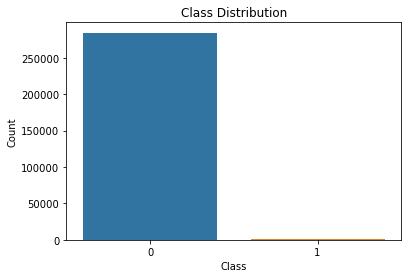

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- This plot displays the distribution of the target variable 'Class', showing the count of genuine and fraudulent transactions.

### Visualize Correlation Matrix:

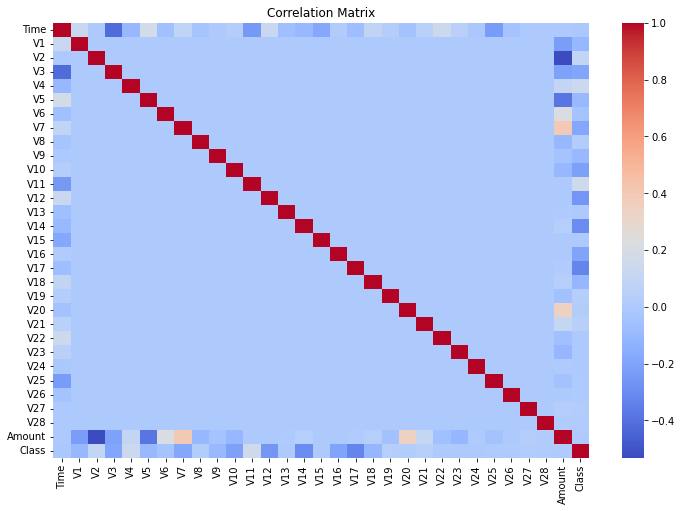

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

- This heatmap visualizes the correlation between numeric features, helping you understand potential relationships among the variables.

### Visualize Feature Distributions:

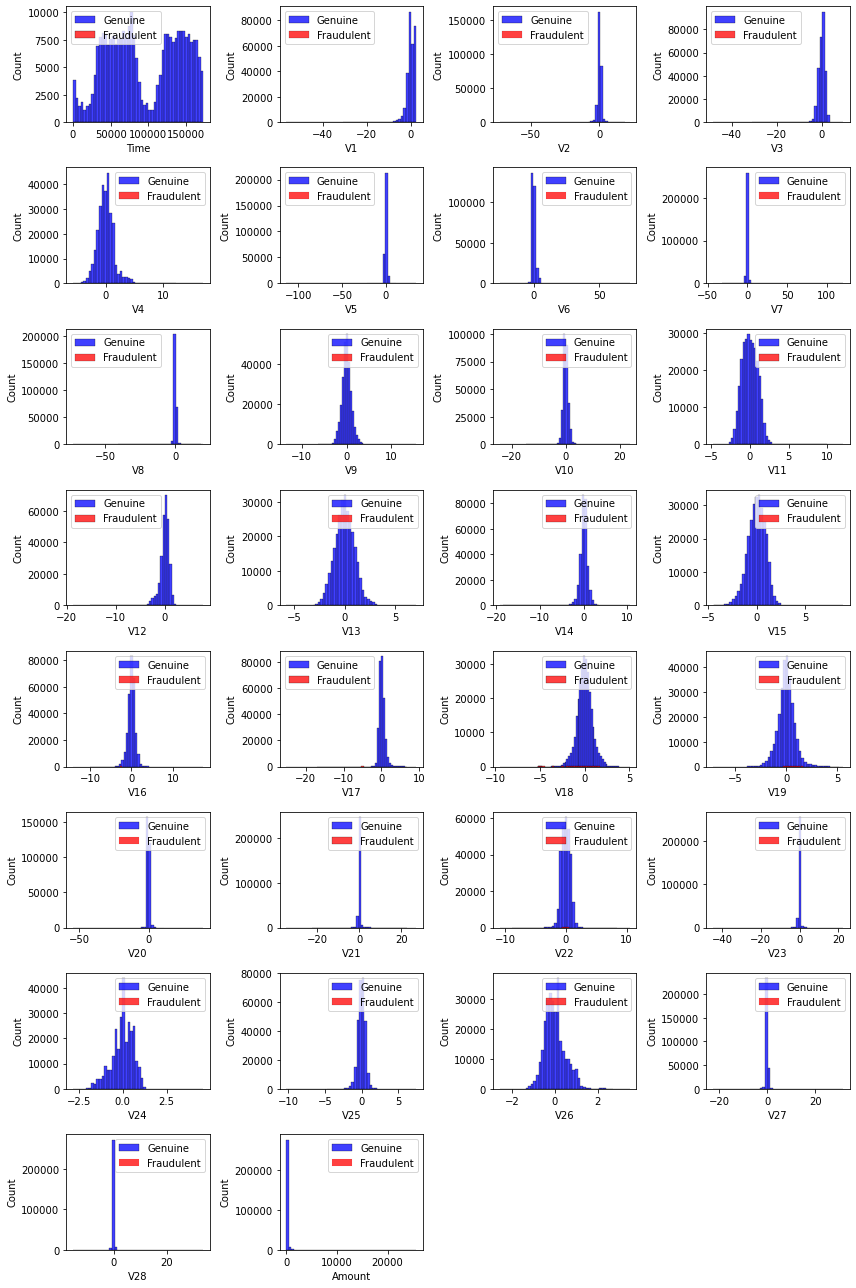

In [8]:
features = data.columns[:-1]
plt.figure(figsize=(12, 18))
for i, feature in enumerate(features, 1):
    plt.subplot(8, 4, i)
    sns.histplot(data[data['Class'] == 0][feature], bins=50, color='blue', label='Genuine')
    sns.histplot(data[data['Class'] == 1][feature], bins=50, color='red', label='Fraudulent')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

- This loop plots histograms for each feature, separately for genuine and fraudulent transactions. It helps visualize differences in feature distributions between the two classes.

### Import Libraries:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [17]:
# Separate features (X) and target (y)
X = data.drop('Class', axis=1) # X= data.iloc[:, :-1]
y = data['Class']              # y =data.iloc[:, -1]

- Divide the dataset into feature matrix X and target vector y.

In [18]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Use train_test_split() to partition the data into training (80%) and testing (20%) sets. Set a random seed for reproducibility.

### Normalize the data using StandardScaler

In [19]:
scaler = StandardScaler()

- Standardize the features using StandardScaler to ensure they have zero mean and unit variance.

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train an XGBoost classification model with class_weight parameter

In [21]:
model = XGBClassifier(random_state=42, scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

- Train an XGBoost classifier on the training data using the XGBClassifier with the scale_pos_weight parameter set to balance the class distribution. This parameter adjusts the algorithm's weight for the minority class.

### Make predictions on the test set

In [22]:
y_pred = model.predict(X_test)

- Use the trained model to predict classes for the test set.

### Evaluate the model's performance using classification report

In [23]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



- Compute a classification report using classification_report to assess model performance, including metrics like precision, recall, and F1-score.